In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("04-MPG.csv")
df.head()

,mpg,fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,13.067477,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,15.680972,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,13.067477,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,14.700911,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,13.836152,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
#Defining X and Y
#x ba horsepower kar darim
# x = df.iloc[:,4].values.reshape(-1,1)
# y = df.iloc [:,[1]].values

#be 2 halat mishe reshape(-1,1) kard yekish hamin .reshape(-1,1) hast yeki digash inke [] ezafe konim be [:,-1] va beshe [:-[1]]

In [4]:
#dige faghat ba ye variabel kar nadarim ke horse power bood inja mikhaim ba chandta kar dashte bashim
x = df.iloc[:,2:-2].values
y = df.iloc [:,[1]].values

In [5]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=40)
#chon dige klassifering nis o numerical hast dige stratify nemikhad
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)



In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)


c:\Users\mrahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

# Evaluate =====

In [14]:
y_pred = model.predict(x_test)
print(y_pred)

[ 8.8930316   8.21777017 13.42529851 12.57783862 11.46932053  7.96966964
  8.38371798 14.69535233 12.88513565 11.64039095  7.9626005  17.14342001
  7.63616822 13.08181781  9.99810481  6.42614778 14.70910068  9.5807498
  7.90266768 19.73921358 16.77862014  7.33050081 20.06457221 19.0894297
  7.01530178 16.98643078 13.80287959 10.65183934 14.80809789  8.18821606
  6.9949667  17.30082718  9.44921903 18.5621756  16.65540206 10.64455573
 10.30301707  6.47752136 11.60980977  7.05140797  7.69037277 14.9838402
 14.58088461  9.82387857  6.72794989 13.88235709 15.80807008  6.81015056
  8.57364091 11.65604788 13.92592584  9.80875317 11.71503409  9.5524097
  8.1949452  15.78593064  9.86697595  6.64781764 18.29740158  8.48791988
 12.36125747 16.59906691 18.94068052 13.65425096 16.64280128 15.56229733
  9.85861222  6.80340201 14.36604223  9.87589875 17.24171008  9.44030931
  6.8601316  11.42672998 11.85070904 12.09152162 15.65213503  8.88676262
 12.10818387 15.68505917  5.58654614 10.09872518 16.954

In [9]:
print(model.intercept_)
print(model.coef_)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'intercept_'

# ==== Evaluation ====

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score


In [16]:
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE: {mae}")
mse = mean_squared_error(y_test,y_pred)
print(f"MSE: {mse}")
#rmse
print(f"RMSE: {np.sqrt(mse)}")
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f"MAPE: {mape}")
r2 = r2_score(y_test,y_pred)
print(f"r2: {r2}")

MAE: 0.9590344393237755
MSE: 2.0077928814638364
RMSE: 1.4169660833851445
MAPE: 0.08266887102739956
r2: 0.875459475054768


# ===== Visualisation ======

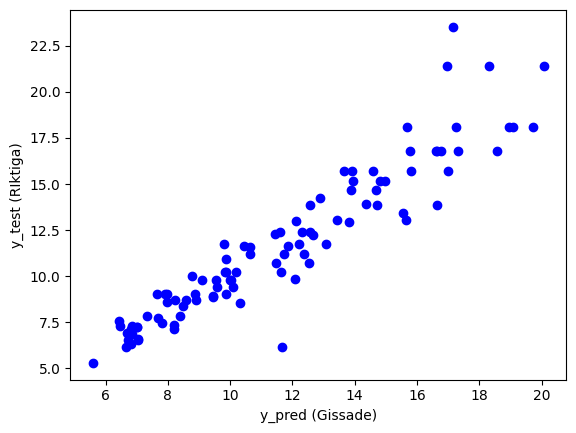

In [17]:
plt.scatter(y_pred,y_test,color="blue")
plt.xlabel("y_pred (Gissade)")
plt.ylabel("y_test (RIktiga)")
plt.show()
#y_pred,y_test mishe tu mehvare ofoghi x biad y_pred vezare tu mehvare amudi y biad y_test bezare